In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random.mtrand import shuffle
from keras import regularizers

In [8]:
dataset = pd.read_json('drive/MyDrive/Selection.json')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,579,580,581,582,583,584,585,586,587,588
0,"{'Name': 'CVE-2022-31186', 'Score': 3.3, 'Clas...","{'Name': 'CVE-2022-31177', 'Score': 2.7, 'Clas...","{'Name': 'CVE-2022-37394', 'Score': 3.3, 'Clas...","{'Name': 'CVE-2022-27621', 'Score': 3.8, 'Clas...","{'Name': 'CVE-2022-2459', 'Score': 2.7, 'Clase...","{'Name': 'CVE-2022-2456', 'Score': 2.7, 'Clase...","{'Name': 'CVE-2022-2307', 'Score': 3.8, 'Clase...","{'Name': 'CVE-2022-33720', 'Score': 2.4, 'Clas...","{'Name': 'CVE-2022-33718', 'Score': 3.3, 'Clas...","{'Name': 'CVE-2022-33714', 'Score': 3.3, 'Clas...",...,"{'Name': 'CVE-2021-25519', 'Score': 3.3, 'Clas...","{'Name': 'CVE-2018-25022', 'Score': 3.1, 'Clas...","{'Name': 'CVE-2021-39945', 'Score': 2.7, 'Clas...","{'Name': 'CVE-2021-44436', 'Score': 3.3, 'Clas...","{'Name': 'CVE-2021-44431', 'Score': 3.3, 'Clas...","{'Name': 'CVE-2021-44448', 'Score': 3.3, 'Clas...","{'Name': 'CVE-2021-44444', 'Score': 3.3, 'Clas...","{'Name': 'CVE-2021-42070', 'Score': 3.3, 'Clas...","{'Name': 'CVE-2021-42069', 'Score': 3.3, 'Clas...","{'Name': 'CVE-2021-42068', 'Score': 3.3, 'Clas..."
1,"{'Name': 'CVE-2022-35775', 'Score': 6.5, 'Clas...","{'Name': 'CVE-2022-35774', 'Score': 4.9, 'Clas...","{'Name': 'CVE-2022-34716', 'Score': 5.9, 'Clas...","{'Name': 'CVE-2022-31185', 'Score': 5.3, 'Clas...","{'Name': 'CVE-2022-31182', 'Score': 5.3, 'Clas...","{'Name': 'CVE-2022-31178', 'Score': 4.3, 'Clas...","{'Name': 'CVE-2022-31155', 'Score': 4.3, 'Clas...","{'Name': 'CVE-2022-31154', 'Score': 4.3, 'Clas...","{'Name': 'CVE-2022-31148', 'Score': 5.4, 'Clas...","{'Name': 'CVE-2022-31128', 'Score': 5.4, 'Clas...",...,"{'Name': 'CVE-2021-42196', 'Score': 5.5, 'Clas...","{'Name': 'CVE-2021-36890', 'Score': 4.3, 'Clas...","{'Name': 'CVE-2021-36866', 'Score': 4.8, 'Clas...","{'Name': 'CVE-2022-26973', 'Score': 5.3, 'Clas...","{'Name': 'CVE-2022-26972', 'Score': 6.1, 'Clas...","{'Name': 'CVE-2022-26971', 'Score': 5.3, 'Clas...","{'Name': 'CVE-2022-26491', 'Score': 5.9, 'Clas...","{'Name': 'CVE-2022-24967', 'Score': 5.4, 'Clas...","{'Name': 'CVE-2022-24238', 'Score': 6.1, 'Clas...","{'Name': 'CVE-2022-23237', 'Score': 6.1, 'Clas..."
2,"{'Name': 'CVE-2022-35773', 'Score': 7.8, 'Clas...","{'Name': 'CVE-2022-35772', 'Score': 7.2, 'Clas...","{'Name': 'CVE-2022-35771', 'Score': 7.8, 'Clas...","{'Name': 'CVE-2022-35769', 'Score': 7.5, 'Clas...","{'Name': 'CVE-2022-35768', 'Score': 7.8, 'Clas...","{'Name': 'CVE-2022-35767', 'Score': 8.1, 'Clas...","{'Name': 'CVE-2022-35766', 'Score': 8.1, 'Clas...","{'Name': 'CVE-2022-35765', 'Score': 7.8, 'Clas...","{'Name': 'CVE-2022-35764', 'Score': 7.8, 'Clas...","{'Name': 'CVE-2022-35763', 'Score': 7.8, 'Clas...",...,"{'Name': 'CVE-2021-34081', 'Score': 8.8, 'Clas...","{'Name': 'CVE-2021-34078', 'Score': 8.8, 'Clas...","{'Name': 'CVE-2022-24701', 'Score': 7.8, 'Clas...","{'Name': 'CVE-2022-24700', 'Score': 7.5, 'Clas...","{'Name': 'CVE-2022-24581', 'Score': 7.5, 'Clas...","{'Name': 'CVE-2022-24241', 'Score': 7.5, 'Clas...","{'Name': 'CVE-2022-22767', 'Score': 8.8, 'Clas...","{'Name': 'CVE-2022-1968', 'Score': 7.8, 'Clase...","{'Name': 'CVE-2022-1949', 'Score': 7.5, 'Clase...","{'Name': 'CVE-2022-1943', 'Score': 7.8, 'Clase..."
3,"{'Name': 'CVE-2022-34715', 'Score': 9.8, 'Clas...","{'Name': 'CVE-2022-31188', 'Score': 9.8, 'Clas...","{'Name': 'CVE-2022-31183', 'Score': 9.8, 'Clas...","{'Name': 'CVE-2022-31181', 'Score': 9.8, 'Clas...","{'Name': 'CVE-2022-31180', 'Score': 9.8, 'Clas...","{'Name': 'CVE-2022-31179', 'Score': 9.8, 'Clas...","{'Name': 'CVE-2020-28437', 'Score': 9.8, 'Clas...","{'Name': 'CVE-2020-28434', 'Score': 9.8, 'Clas...","{'Name': 'CVE-2020-28433', 'Score': 9.8, 'Clas...","{'Name': 'CVE-2020-28425', 'Score': 9.8, 'Clas...",...,"{'Name': 'CVE-2022-2023', 'Score': 9.8, 'Clase...","{'Name': 'CVE-2022-34005', 'Score': 9.8, 'Clas...","{'Name': 'CVE-2022-31800', 'Score': 9.8, 'Clas...","{'Name': 'CVE-2022-2128', 'Score': 9.8, 'Clase...","{'Name': 'CVE-2017-20067', 'Score': 9.8, 'Clas...","{'Name': '

In [11]:
dataset.T.isna().mean()

0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64

In [ ]:
np_dataset = dataset.to_numpy()

In [ ]:
print(np_dataset)

[[{'Name': 'CVE-2022-31186', 'Score': 3.3, 'Clase': 'LOW', 'AV': 'L', 'AC': 'L', 'PR': 'L', 'UI': 'N', 'S': 'U', 'C': 'L', 'I': 'N', 'A': 'N'}
  {'Name': 'CVE-2022-31177', 'Score': 2.7, 'Clase': 'LOW', 'AV': 'N', 'AC': 'L', 'PR': 'H', 'UI': 'N', 'S': 'U', 'C': 'L', 'I': 'N', 'A': 'N'}
  {'Name': 'CVE-2022-37394', 'Score': 3.3, 'Clase': 'LOW', 'AV': 'L', 'AC': 'L', 'PR': 'L', 'UI': 'N', 'S': 'U', 'C': 'N', 'I': 'N', 'A': 'L'}
  ...
  {'Name': 'CVE-2021-42070', 'Score': 3.3, 'Clase': 'LOW', 'AV': 'L', 'AC': 'L', 'PR': 'N', 'UI': 'R', 'S': 'U', 'C': 'N', 'I': 'N', 'A': 'L'}
  {'Name': 'CVE-2021-42069', 'Score': 3.3, 'Clase': 'LOW', 'AV': 'L', 'AC': 'L', 'PR': 'N', 'UI': 'R', 'S': 'U', 'C': 'N', 'I': 'N', 'A': 'L'}
  {'Name': 'CVE-2021-42068', 'Score': 3.3, 'Clase': 'LOW', 'AV': 'L', 'AC': 'L', 'PR': 'N', 'UI': 'R', 'S': 'U', 'C': 'N', 'I': 'N', 'A': 'L'}]
 [{'Name': 'CVE-2022-35775', 'Score': 6.5, 'Clase': 'MEDIUM', 'AV': 'N', 'AC': 'L', 'PR': 'H', 'UI': 'N', 'S': 'U', 'C': 'N', 'I': 'H',

In [ ]:

output = np.empty(2356, float)
i = 0;
np.random.shuffle(np_dataset)
for line in np_dataset:
  np.random.shuffle(line)
  for column in line:
    try:
      output[i] = float(column['Score']) / 10
      i+=1
    except KeyError:
      output[i] = float(column['score']) /10
      i+=1

In [ ]:
print(output)

[0.35 0.31 0.33 ... 0.93 0.98 0.98]


In [ ]:
input = np.empty((2356, 8), float)
i = 0
for line in np_dataset:
  for column in line:
    if(str(column['AV']) == 'N'):
        input[i, 0] = 1.
    elif(str(column['AV']) == 'A'):
        input[i, 0] = 0.75
    elif(str(column['AV']) == 'L'):
        input[i, 0] = 0.5
    elif(str(column['AV']) == 'P'):
        input[i, 0] = 0.25

    if(str(column['AC']) == 'H'):
        input[i, 1] = 0.5
    elif(str(column['AC']) == 'L'):
        input[i, 1] = 1.0

    if(str(column['PR']) == 'H'):
        input[i, 2] = 0.33
    elif(str(column['PR']) == 'L'):
        input[i, 2] = 0.66
    elif(str(column['PR']) == 'N'):
        input[i, 2] = 1.0

    if(str(column['UI']) == 'R'):
        input[i, 3] = 1.0
    elif(str(column['UI']) == 'N'):
        input[i, 3] = 0.0

    if(str(column['S']) == 'U'):
        input[i, 4] = 0.0
    elif(str(column['S']) == 'C'):
        input[i, 4] = 1.0

    if(str(column['C']) == 'N'):
        input[i, 5] = 0.0
    elif(str(column['C']) == 'L'):
        input[i, 5] = 0.5
    elif(str(column['C']) == 'H'):
        input[i, 5] = 1.0  

    if(str(column['I']) == 'N'):
        input[i, 6] = 0.0
    elif(str(column['I']) == 'L'):
        input[i, 6] = 0.5
    elif(str(column['I']) == 'H'):
        input[i, 6] = 1.0  

    if(str(column['A']) == 'N'):
        input[i, 7] = 0.0
    elif(str(column['A']) == 'L'):
        input[i, 7] = 0.5
    elif(str(column['A']) == 'H'):
        input[i, 7] = 1.0
    i+=1

In [ ]:
print(input.shape)

(2356, 8)


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (8,)),
    keras.layers.Dense(8, activation="relu", bias_regularizer=regularizers.L2(1e-4), activity_regularizer=regularizers.L2(1e-5)),
    keras.layers.Dense(4, activation="relu", bias_regularizer=regularizers.L2(1e-4), activity_regularizer=regularizers.L2(1e-5)),
    keras.layers.Dense(1, activation="sigmoid")])

In [ ]:
model.compile(optimizer = "Adam", loss="mean_squared_error", metrics="Recall")

In [ ]:
history = model.fit(input, output, epochs=300)
model.summary()

Epoch 1/300
74/74 [==============================] - 1s 3ms/step - loss: 0.1337 - recall: 0.2190
Epoch 2/300
74/74 [==============================] - 0s 3ms/step - loss: 0.0871 - recall: 0.8039
Epoch 3/300
74/74 [==============================] - 0s 2ms/step - loss: 0.0679 - recall: 0.9703
Epoch 4/300
74/74 [==============================] - 0s 3ms/step - loss: 0.0555 - recall: 0.8357
Epoch 5/300
74/74 [==============================] - 0s 3ms/step - loss: 0.0450 - recall: 0.7975
Epoch 6/300
74/74 [==============================] - 0s 3ms/step - loss: 0.0359 - recall: 0.7924
Epoch 7/300
74/74 [==============================] - 0s 3ms/step - loss: 0.0279 - recall: 0.7432
Epoch 8/300
74/74 [==============================] - 0s 3ms/step - loss: 0.0215 - recall: 0.7390
Epoch 9/300
74/74 [==============================] - 0s 3ms/step - loss: 0.0171 - recall: 0.7143
Epoch 10/300
74/74 [==============================] - 0s 3ms/step - loss: 0.0142 - recall: 0.7067
Epoch 11/300
74/74 [=========

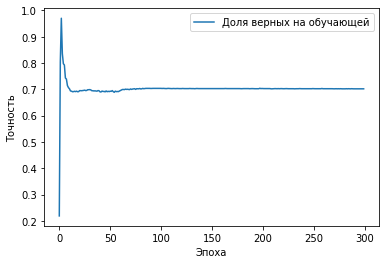

In [ ]:
plt.plot(history.history['recall'], label = 'Доля верных на обучающей')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()